In [1]:
# Importing dependencies
%matplotlib inline  
import os
import cv2
import time
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torchvision
import matplotlib
import matplotlib.pyplot as plt
import gym
from pyglet.window import key
from gym.envs.box2d.car_racing import *

In [2]:
# Is gpu available?
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")
    
print(device)

cuda:0


In [3]:
# To log key presses
def key_press(k, mod):
    global end
    global restart
    global action
    
    if k==key.END:
        end = True
    if k==key.RETURN:
        restart = True
    if k==key.LEFT:
        action[0] = -1.0
    if k==key.RIGHT:
        action[0] = +1.0
    if k==key.UP:
        action[1] = +1.0
    if k==key.DOWN:
        action[2] = +0.8   
 

def key_release(k, mod):
    global action
    if k==key.LEFT  and action[0]==-1.0:
        action[0] = 0
    if k==key.RIGHT and action[0]==+1.0:
        action[0] = 0
    if k==key.UP:
        action[1] = 0
    if k==key.DOWN:
        action[2] = 0

end = False
restart = False
env = CarRacing()

action = np.array([0, 0, 0], dtype=np.float16)

# Function for generating data by playing
def start_playing():
    global restart
    global action
    global end
    fig, ax = plt.subplots(1, 1)
    env.render()
    env.viewer.window.on_key_press = key_press
    env.viewer.window.on_key_release = key_release
    prev_observation = env.reset()
    restart = False
    
    points = ax.imshow(prev_observation)
    while True:
        # Render the env
        env.render()           
        observation, reward, done, info = env.step(action)
        points.set_data(observation[:,:,0])
        fig.canvas.draw()
        prev_observation=observation
        if done:
            env.close()
            break
    plt.close(fig)

Track generation: 1136..1424 -> 288-tiles track


KeyboardInterrupt: 

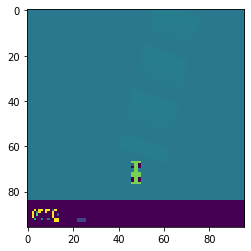

In [4]:
start_playing()

In [ ]:
encoder = torch.load("models/encoder-five-epochs.pt")
decoder = torch.load("models/decoder-five-epochs.pt")
rnn = torch.load("models/mdnrnn-wo-training.pt")

encoder.to(device)
decoder.to(device)
rnn.to(device)

encoder.eval()
decoder.eval()
rnn.eval()